# STAT 315 Final Project - LEGOs!

---

# Defining the Question
For our data analysis on the LEGO dataset, we decided to explore the problem:  **“Which Lego Themes Have Grown or Declined Over Time?”**

This problem will help us guide this report as we collect, clean, prepare, analyze, and interpret the information we gather on LEGO's and the everchanging patterns of LEGO themes! This question can be interpreted in different ways, whether is growth/decline in popularity or growth/decline in number of sets! With this very general question, we break it down into 3 specific questions we will be exploring with this report:

1. How has the average part count per set changed over time within the five largest LEGO themes?
2. How has the growth in total LEGO sets released each year varied across different LEGO themes?
3. How has the diversity of LEGO parts in the top five most popular themes increased over time?

---

# Data Collection
For this project, we collected LEGO theme–year data using SQL queries on the DataCamp-provided LEGO database, which includes the original sets and themes tables. 

https://rebrickable.com/downloads/

The dataset contains information spanning from the 1950s through the 2010s and includes key variables such as theme_id, theme_name, year, num_sets released each year, and additional summary statistics like average, minimum, and maximum part counts. We also generated features such as each theme’s share_of_year and total sets released per year, which help measure theme dominance and overall production trends. The dataset consists of several thousand theme–year observations and provides enough temporal and categorical detail to evaluate how LEGO production evolved over time. While the data is comprehensive, some early years contain missing values due to themes appearing for the first time. Overall, this dataset is well-suited to answering our research question about how different LEGO themes contributed to the company’s long-term growth.

In [ ]:
-- Explore the data in the table
SELECT *
FROM public.themes
LIMIT 50

,id,name,parent_id
0,2,Arctic Technic,1
1,3,Competition,1
2,4,Expert Builder,1
3,5,Model,1
4,6,Airport,5
5,7,Construction,5
6,8,Farm,5
7,9,Fire,5
8,10,Harbor,5
9,11,Off-Road,5


---

# Data Cleaning and Preparation
In order to explore our first question "How has the average part count per set changed over time within the three largest LEGO themes?", we needed to construct a table by cleaning and preparing the information we have available in our LEGO database. For this specific question, we needed a complete table with the year, name of the theme, and average number of parts for each set. First, the top 5 largest themes by number of sets needed to be identfied so a table was constructed as shown below:

In [9]:
SELECT t.id, t.name
FROM themes t
JOIN sets s ON s.theme_id = t.id
WHERE t.name <> 'Supplemental' and t.name <> 'Gear' and t.name <> 'Service Packs'
GROUP BY t.id, t.name
ORDER BY COUNT(*) DESC
LIMIT 5

,id,name
0,504,Duplo
1,220,City
2,494,Friends
3,435,Ninjago
4,1,Technic


This table displays only the top 5 most largest themes by number of sets: Duplo, City, Friends, Ninjago, and Technic. This was done by retrieving the count of sets in each theme, ordering in descending order, and finally, limiting the view by 5 rows, giving us the top 5 themes in the LEGO database.

Now that we have identified the top 5 themes, with this information we are able to construct our final table that will display the number of parts per set for each theme over the years by using the 1st query we explored as a subquery for the top themes, and displaying each theme with the years in order. This way, we are able to see the part count for each themed set for each theme as seen below!

This is important in later sections because we will have to use the counts of each set as a way to bootstrap the average mean for each average parts per set for each theme.

Note: We had to exclude LEGOs from the theme "Supplemental", "Service Packs", and "Gear" because rather it being an established theme, they are collections of basic LEGO bricks, for creative LEGO users.

In [13]:
WITH top_themes AS (
    SELECT t.id, t.name
    FROM themes t
    JOIN sets s ON s.theme_id = t.id
    WHERE t.name <> 'Supplemental'
      AND t.name <> 'Gear'
      AND t.name <> 'Service Packs'
    GROUP BY t.id, t.name
    ORDER BY COUNT(*) DESC
    LIMIT 5
)
SELECT 
    s.year,
    t.name AS theme_name,
    s.num_parts
FROM sets s
JOIN top_themes t ON s.theme_id = t.id
WHERE s.year IS NOT NULL
ORDER BY t.name, s.year;



,year,theme_name,num_parts
0,2005,City,11
1,2005,City,5
2,2005,City,4
3,2005,City,8
4,2005,City,5
...,...,...,...
985,2017,Technic,369
986,2017,Technic,1326
987,2017,Technic,568
988,2017,Technic,593


To help us answer the question, "How has the growth in total LEGO sets released each year varied across different LEGO themes?" We first need to clean our data. For this, we set up two SQL queries that develop two tables that will then be used in three graphics. First, we need a SQL table that will give us theme name, year, and number of sets. This is important for setting up our pie chart and then our plot of how themes change over time, especially the amount of a certain theme and how that changes in a time series environment over years. Then, a second table that takes in theme name and years to help build out our table to show how major themes have changed over the last 30 years, and how their standard distribution has changed.

In [27]:
SELECT
    t.name AS theme_name,
    s.year,
    COUNT(*) AS num_sets
FROM sets AS s
JOIN themes AS t
  ON s.theme_id = t.id
GROUP BY
    t.name,
    s.year
ORDER BY
    t.name,
    s.year;


,theme_name,year,num_sets
0,12V,1969,12
1,12V,1970,4
2,12V,1972,1
3,12V,1974,6
4,12V,1977,1
...,...,...,...
2091,X-Men,2014,1
2092,X-Pod,2004,15
2093,X-Pod,2005,4
2094,Znap,1998,12


In [30]:
SELECT
    t.name AS theme_name,
    s.year AS year,
    s.set_num AS set_name,
    COUNT(ip.part_num) AS unique_parts
FROM sets AS s
JOIN themes AS t
    ON s.theme_id = t.id
LEFT JOIN inventories AS inv
    ON inv.set_num = s.set_num
LEFT JOIN inventory_parts AS ip
    ON ip.inventory_id = inv.id
GROUP BY
    t.name,
    s.year,
    s.set_num
ORDER BY
    t.name,
    s.year;


,theme_name,year,set_name,unique_parts
0,12V,1969,740-2,1
1,12V,1969,706-1,1
2,12V,1969,721-1,30
3,12V,1969,753-1,5
4,12V,1969,751-1,1
...,...,...,...,...
11668,Znap,1999,3521-1,12
11669,Znap,1999,3505-1,9
11670,Znap,1999,3582-1,41
11671,Znap,1999,3520-1,16


In order to explore our third question "How has the diversity of LEGO parts in the top five most popular themes increased over time?", we needed to construct a new table. For this specific question, we needed a complete table with the year, name of the theme, and the number of unique parts for each set for that year. We can take advantage of the top5_sets sub-query to limit our search to the top 5 most largest LEGO themes. With this subquery, we can now query the number of unique parts for every set in the LEGO City, Duplo, Friends, Ninjago, and Technic themes, as shown below.

We will later use number of unique parts in each set for bootstrapping the average number of unique parts per set for each theme every year, which will give us a more reliable analysis. 

Note: We again excluded the 'Supplemental', 'Gear', and 'Service Packs' themes since they aren't an established theme within the LEGO franchise but instead a collection of specific LEGO bricks meant as an addition for users looking to expand their creativity. We also filtered out multi-pack sets, which wouldn't have an inventory part list associated with that set. Since the multi-packs were made up of sets and not necessarily pieces, it resulted in the calculated unique number of pieces to be null. So to solve this issue, we removed these sets to maintain consistency.

In [14]:
WITH top_themes AS (
    SELECT t.id, t.name
    FROM themes t
    JOIN sets s ON s.theme_id = t.id
    WHERE t.name <> 'Supplemental' AND t.name <> 'Gear' AND t.name <> 'Service Packs'
    GROUP BY t.id, t.name
    ORDER BY COUNT(*) DESC
    LIMIT 5
),
city_theme AS (
    SELECT id, name
    FROM themes
    WHERE name = 'City'
),
selected_themes AS (
    SELECT * FROM top_themes
    UNION
    SELECT * FROM city_theme
),
unique_parts_count AS (
    SELECT
        s.set_num,
        COUNT(DISTINCT ip.part_num) AS unique_parts
    FROM sets s
    JOIN inventories i ON i.set_num = s.set_num
    JOIN inventory_parts ip ON ip.inventory_id = i.id
    GROUP BY s.set_num
)
SELECT
    st.name AS theme_name,
    s.year,
    s.name AS set_name,
    COALESCE(upc.unique_parts, 0) AS unique_parts
FROM
    selected_themes st
JOIN sets s ON s.theme_id = st.id
JOIN unique_parts_count upc ON upc.set_num = s.set_num
ORDER BY
    st.name,
    s.year;

,theme_name,year,set_name,unique_parts
0,City,2005,Advent Calendar 2005 City (Day 3) Rescue Bucket,7
1,City,2005,Advent Calendar 2005 City (Day 7) Safe,8
2,City,2005,Advent Calendar 2005 City (Day 8) Welding Tan...,7
3,City,2005,Advent Calendar 2005 City (Day 4) Policeman,5
4,City,2005,Advent Calendar 2005 City (Day 5) Police Dog ...,6
...,...,...,...,...
1016,Technic,2017,Roadwork Crew,79
1017,Technic,2017,Stunt Bike,47
1018,Technic,2017,Stunt Truck,45
1019,Technic,2017,RC Tracked Racer,55


---

# **Data Analysis**

## **Figure 1)**

This graph is a line graph that shows all of the top 5 themes and their average parts per set count across the years since the first themed set was made. This python code utilizes the part_count_themes data frame that we compiled and organized in the previous section. 

The snippet of python code below shows how we can apply the bootstrap resampling method to our part_count_themes SQL queried table! Here, we perform this bootstrapping method over 1000 times to reduce random variation. With every iteration, we are able to compute the sample mean and finally, determine the bootstrap estimated mean and the 95% confidence interval for each of the 5 top themes. The output of the code can tell us the average parts per set for each theme and the uncertainty around the estimate.

Bootstrapping our part_count_themes table allows us to measure how confident we can be about each theme's true mean size

This uncertainty is represented on the line graph as the shaded band around the mean of each year. You may notice, some of the years for a theme may not have this shaded band but this can be explained by the theme not having released any sets that year!

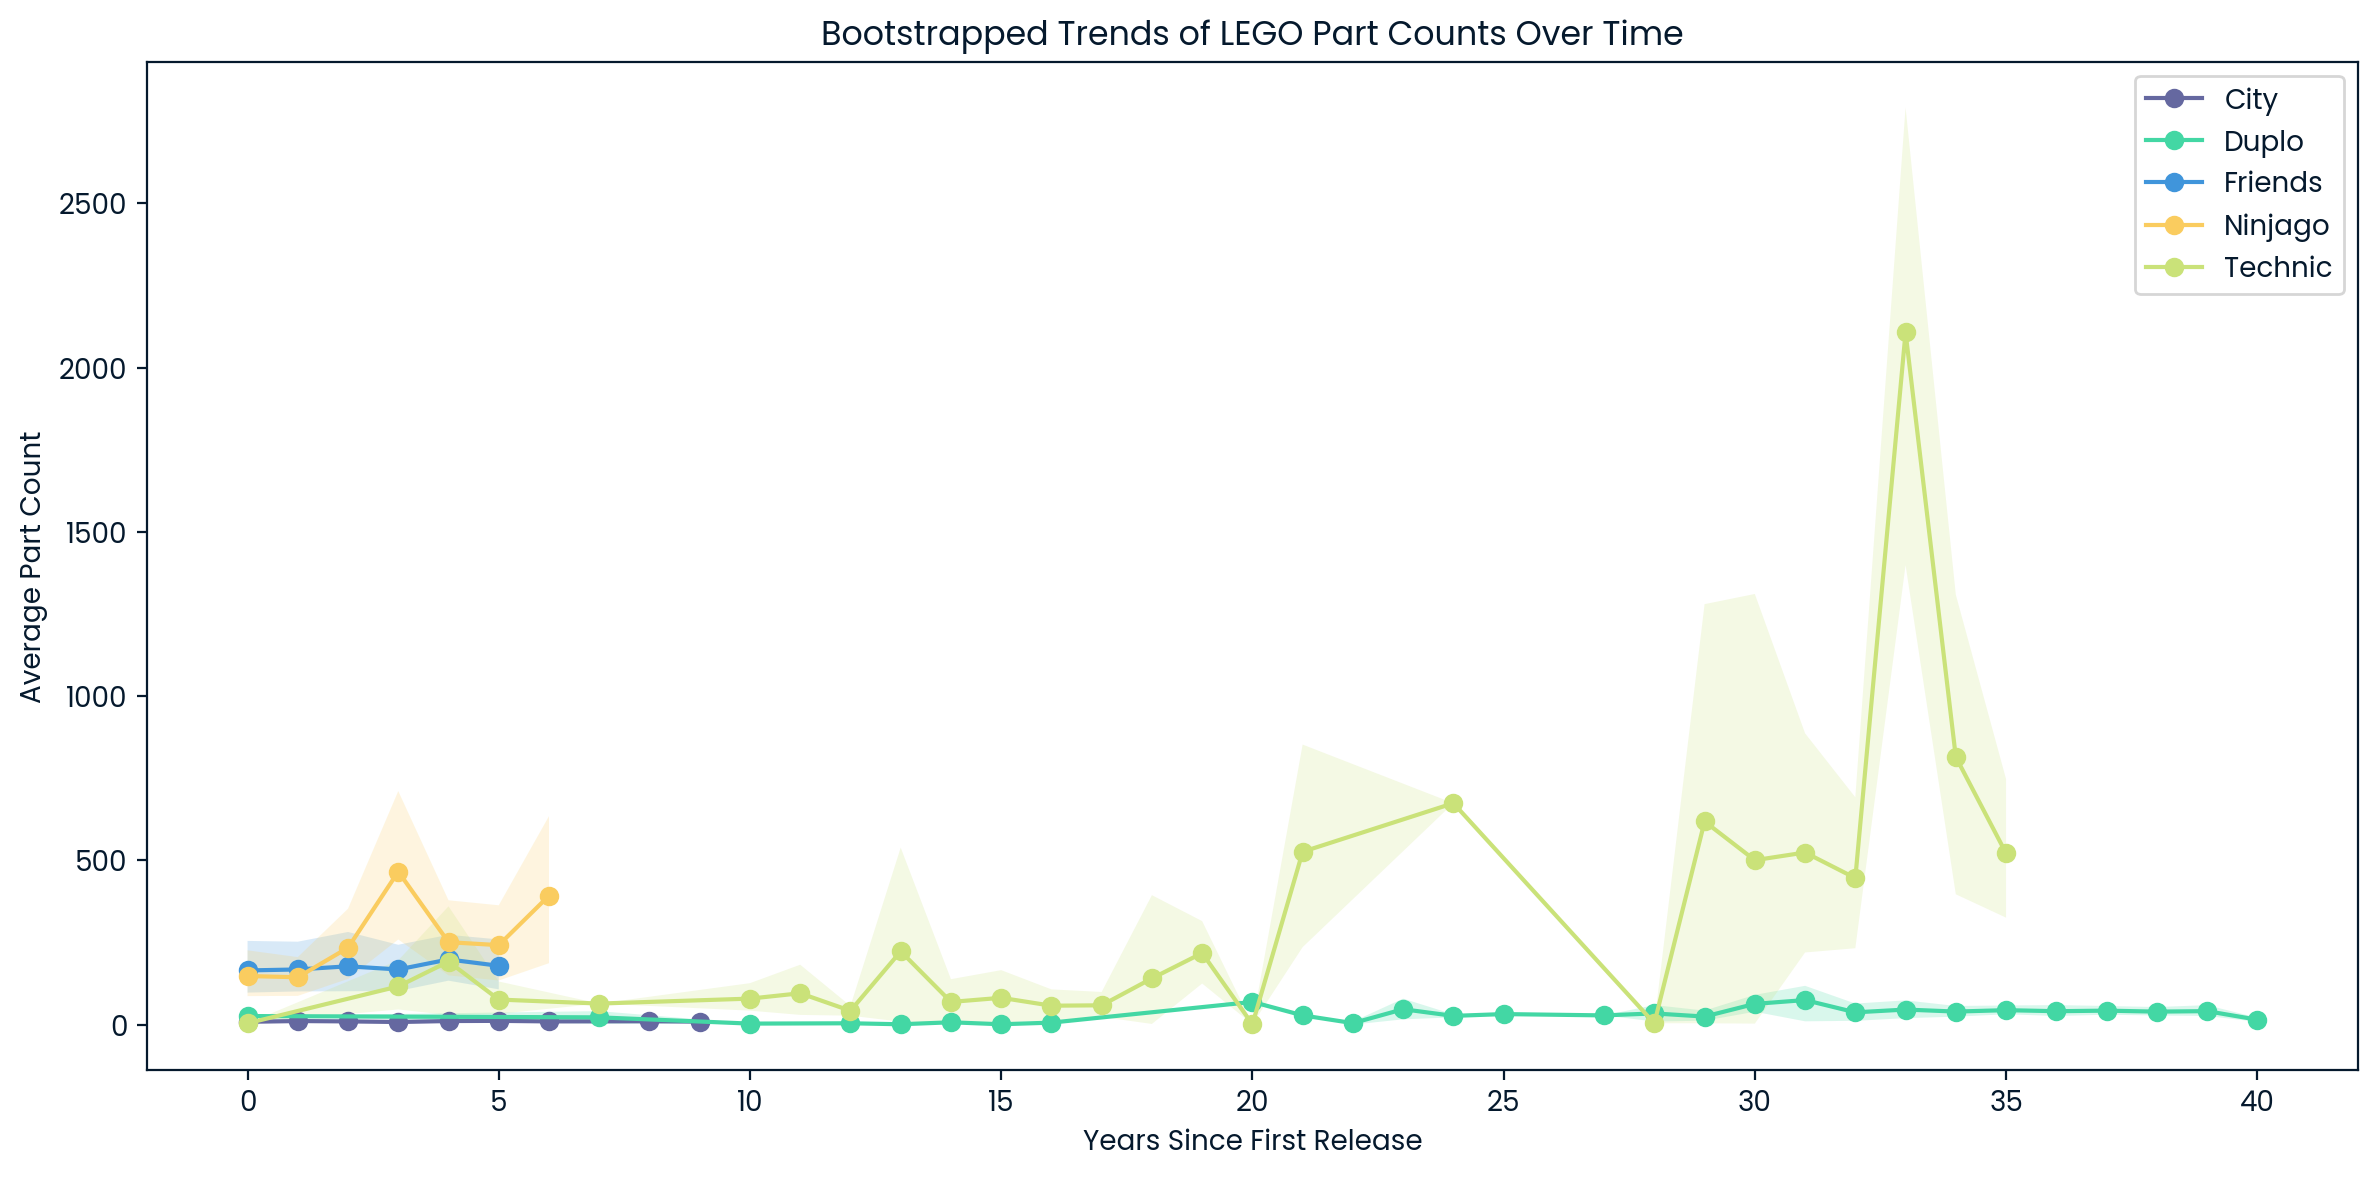

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = part_count_themes.copy()

# Normalize years so each theme starts at year_index = 0
df['year_index'] = df.groupby('theme_name')['year'].transform(lambda x: x - x.min())

# Number of bootstrap samples
B = 1000

# Store bootstrap curves
boot_curves = []

# Loop through each theme separately
for theme, subset in df.groupby('theme_name'):
    yearly_groups = subset.groupby('year_index')
    years = sorted(yearly_groups.groups.keys())

    # Will store bootstrapped values per year
    theme_boot = {y: [] for y in years}

    # bootstrap
    for _ in range(B):
        for y, g in yearly_groups:
            sample = g.sample(frac=1, replace=True)
            theme_boot[y].append(sample["num_parts"].mean())

    boot_curves.append((theme, theme_boot))


# Plotting
plt.figure(figsize=(12, 6))

for theme, boot in boot_curves:
    years = sorted(boot.keys())

    # Compute mean, CI bounds per year
    means = [np.mean(boot[y]) for y in years]
    lower = [np.percentile(boot[y], 2.5) for y in years]
    upper = [np.percentile(boot[y], 97.5) for y in years]

    # Plot mean line
    plt.plot(years, means, marker='o', label=theme)

    # Shaded confidence band
    plt.fill_between(years, lower, upper, alpha=0.2)


plt.xlabel("Years Since First Release")
plt.ylabel("Average Part Count")
plt.title("Bootstrapped Trends of LEGO Part Counts Over Time")
plt.legend()
plt.tight_layout()
plt.show()


## **Figure 2)**

In this figure, we look at ways that we can use Python to analyze this data to give us a better picture of what is going on. Initially, we look to make a pie chart of the variance of how things have changed around themes over time. This shows us that a lot of the dataset are extremely volatile and have lots of changes as they come up, become popular, and then disappear. I chose to use a pie chart for this because it is less of a time series event and more of looking at how different themes are more or less variant. How much percentage of change there is between themes is very interesting, and how a lot of themes start out, become popular, and then disappear and never come back up again, which is illustrated in this large variation.

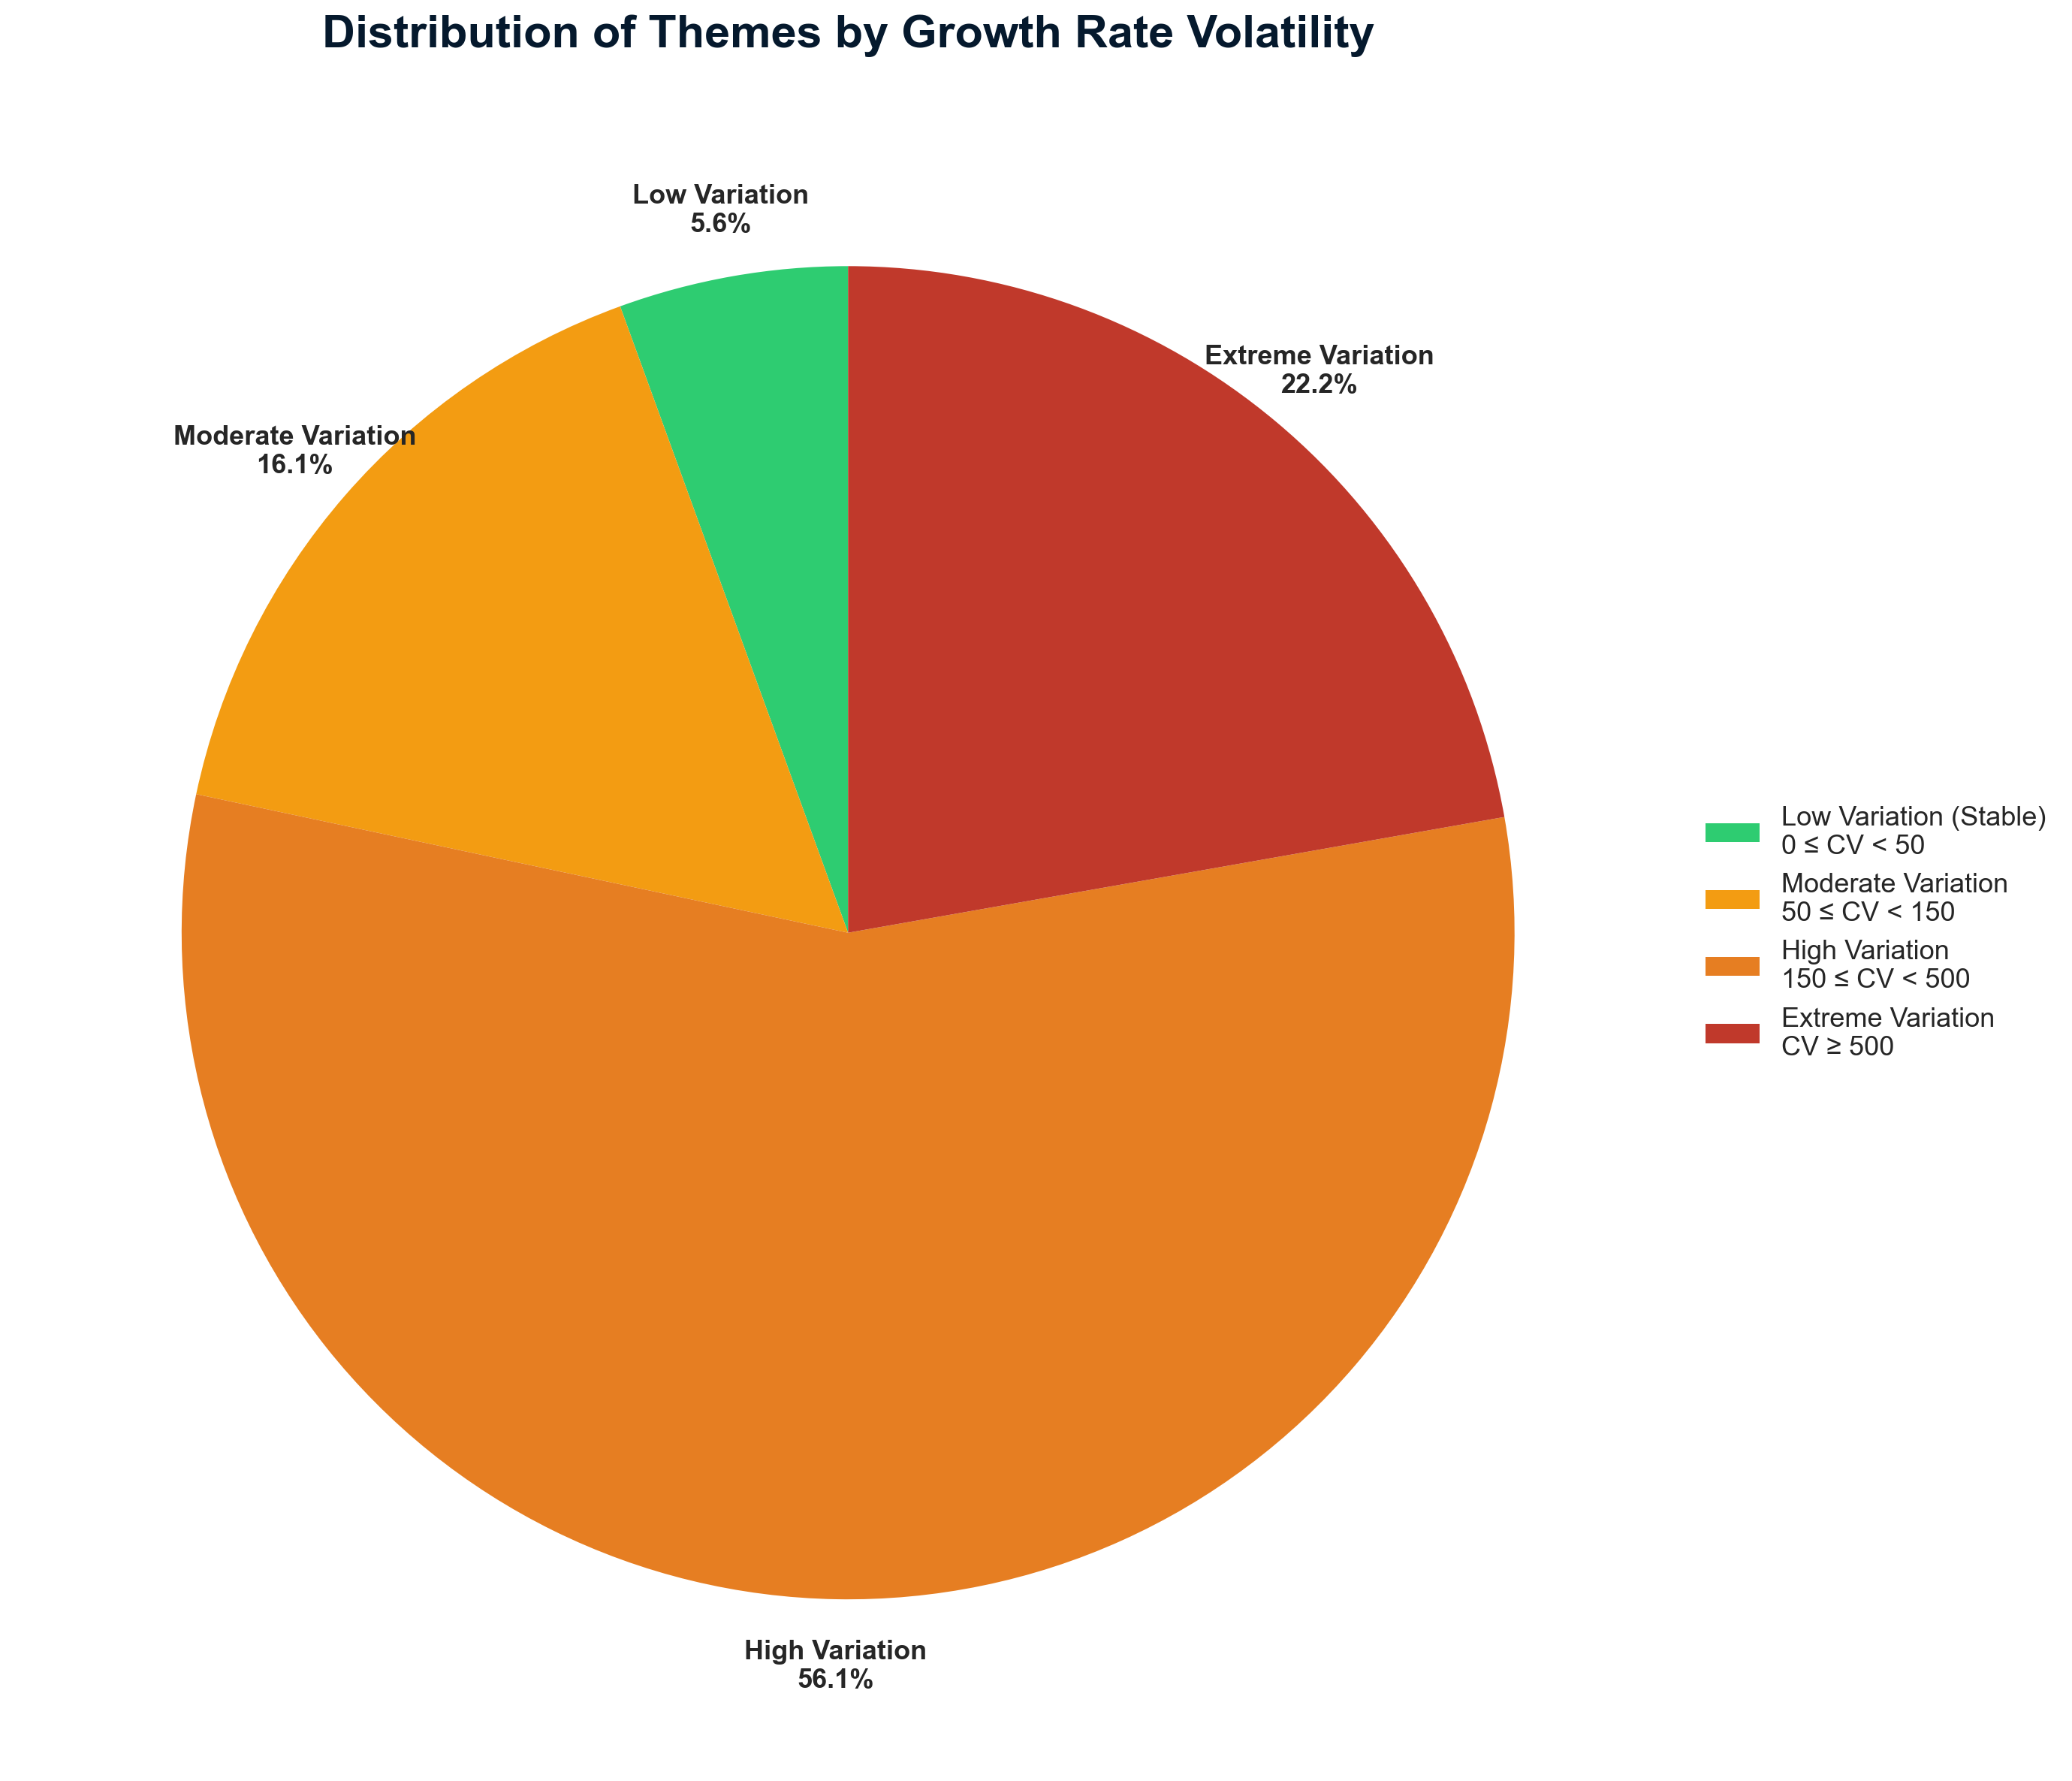

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['font.size'] = 11

theme_year_summary = num_sets_theme_name.copy()
theme_year_summary = theme_year_summary.sort_values(['theme_name', 'year'])

volatility_metrics = []

for theme_name in theme_year_summary['theme_name'].unique():
    theme_data = theme_year_summary[theme_year_summary['theme_name'] == theme_name].sort_values('year')

    if len(theme_data) >= 3:
        theme_data = theme_data.copy()
        theme_data['yoy_pct'] = theme_data['num_sets'].pct_change() * 100
        theme_data = theme_data[theme_data['yoy_pct'].notna()]

        if len(theme_data) > 0:
            growth_rates = theme_data['yoy_pct'].values
            std_dev = np.std(growth_rates)
            mean_rate = np.mean(growth_rates)
            cv = (std_dev / abs(mean_rate) * 100) if mean_rate != 0 else np.inf

            volatility_metrics.append({
                'theme_name': theme_name,
                'mean_growth': mean_rate,
                'std_growth': std_dev,
                'cv': cv if cv != np.inf else 1000,
                'total_sets': theme_data['num_sets'].sum()
            })

vol_df = pd.DataFrame(volatility_metrics)

CV_THRESHOLDS = {
    'Low Variation (Stable)': (0, 50),
    'Moderate Variation': (50, 150),
    'High Variation': (150, 500),
    'Extreme Variation': (500, np.inf)
}

vol_df['volatility_level'] = pd.cut(
    vol_df['cv'],
    bins=[0, 50, 150, 500, np.inf],
    labels=list(CV_THRESHOLDS.keys())
)

vol_counts = vol_df['volatility_level'].value_counts().sort_index()
vol_percentages = (vol_counts / len(vol_df) * 100).round(1)

fig, ax = plt.subplots(figsize=(16, 12))

colors = ['#2ECC71', '#F39C12', '#E67E22', '#C0392B']

labels_simple = []
for label in vol_counts.index:
    pct = vol_percentages[label]
    if 'Low Variation' in label:
        labels_simple.append(f'Low Variation\n{pct:.1f}%')
    elif 'Moderate Variation' in label:
        labels_simple.append(f'Moderate Variation\n{pct:.1f}%')
    elif 'High Variation' in label:
        labels_simple.append(f'High Variation\n{pct:.1f}%')
    elif 'Extreme Variation' in label:
        labels_simple.append(f'Extreme Variation\n{pct:.1f}%')
    else:
        labels_simple.append(f'{label}\n{pct:.1f}%')

wedges, texts, autotexts = ax.pie(
    vol_counts.values,
    labels=labels_simple,
    colors=colors,
    autopct='',
    startangle=90,
    textprops={'fontsize': 14, 'fontweight': 'bold', 'ha': 'center'}
)

for text in texts:
    text.set_fontsize(13)
    text.set_fontweight('bold')

ax.set_title(
    'Distribution of Themes by Growth Rate Volatility',
    fontsize=22,
    fontweight='bold',
    pad=25
)

legend_labels = []
for level in vol_counts.index:
    cv_range = CV_THRESHOLDS[level]
    if cv_range[1] == np.inf:
        cv_range_text = f'CV ≥ {cv_range[0]}'
    else:
        cv_range_text = f'{cv_range[0]} ≤ CV < {cv_range[1]}'
    legend_labels.append(f'{level}\n{cv_range_text}')

ax.legend(
    wedges,
    legend_labels,
    loc='center left',
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=13,
    framealpha=0.9
)

plt.tight_layout()
plt.show()

## **Figure 3)**

To try and answer the question further, we developed this plot that gives deeper insight on themes that have lasted at least 30 years. Showing average production of themes that have lasted at least 30 years, so the most popular and consistent themes and sets, with a rolling mean with a 5 year window this means that you take an average of the two years before it, the current year, and the two years after it, and just the mean of that. This helps reduce noise, smooth volatility, and make long-term patterns more visible, showing a more direct, less noisy data. Additionally we add a standard deviation of both a light and dark band around it, showing normal fluctuation and then large swings. Where the dark bands are considered a ±1 standard deviation normal fluctuation and then beyond that we have the light bands which represent a ±2 standard deviations which are the large high variability. This also represents a method for our project that we did not go over in class.

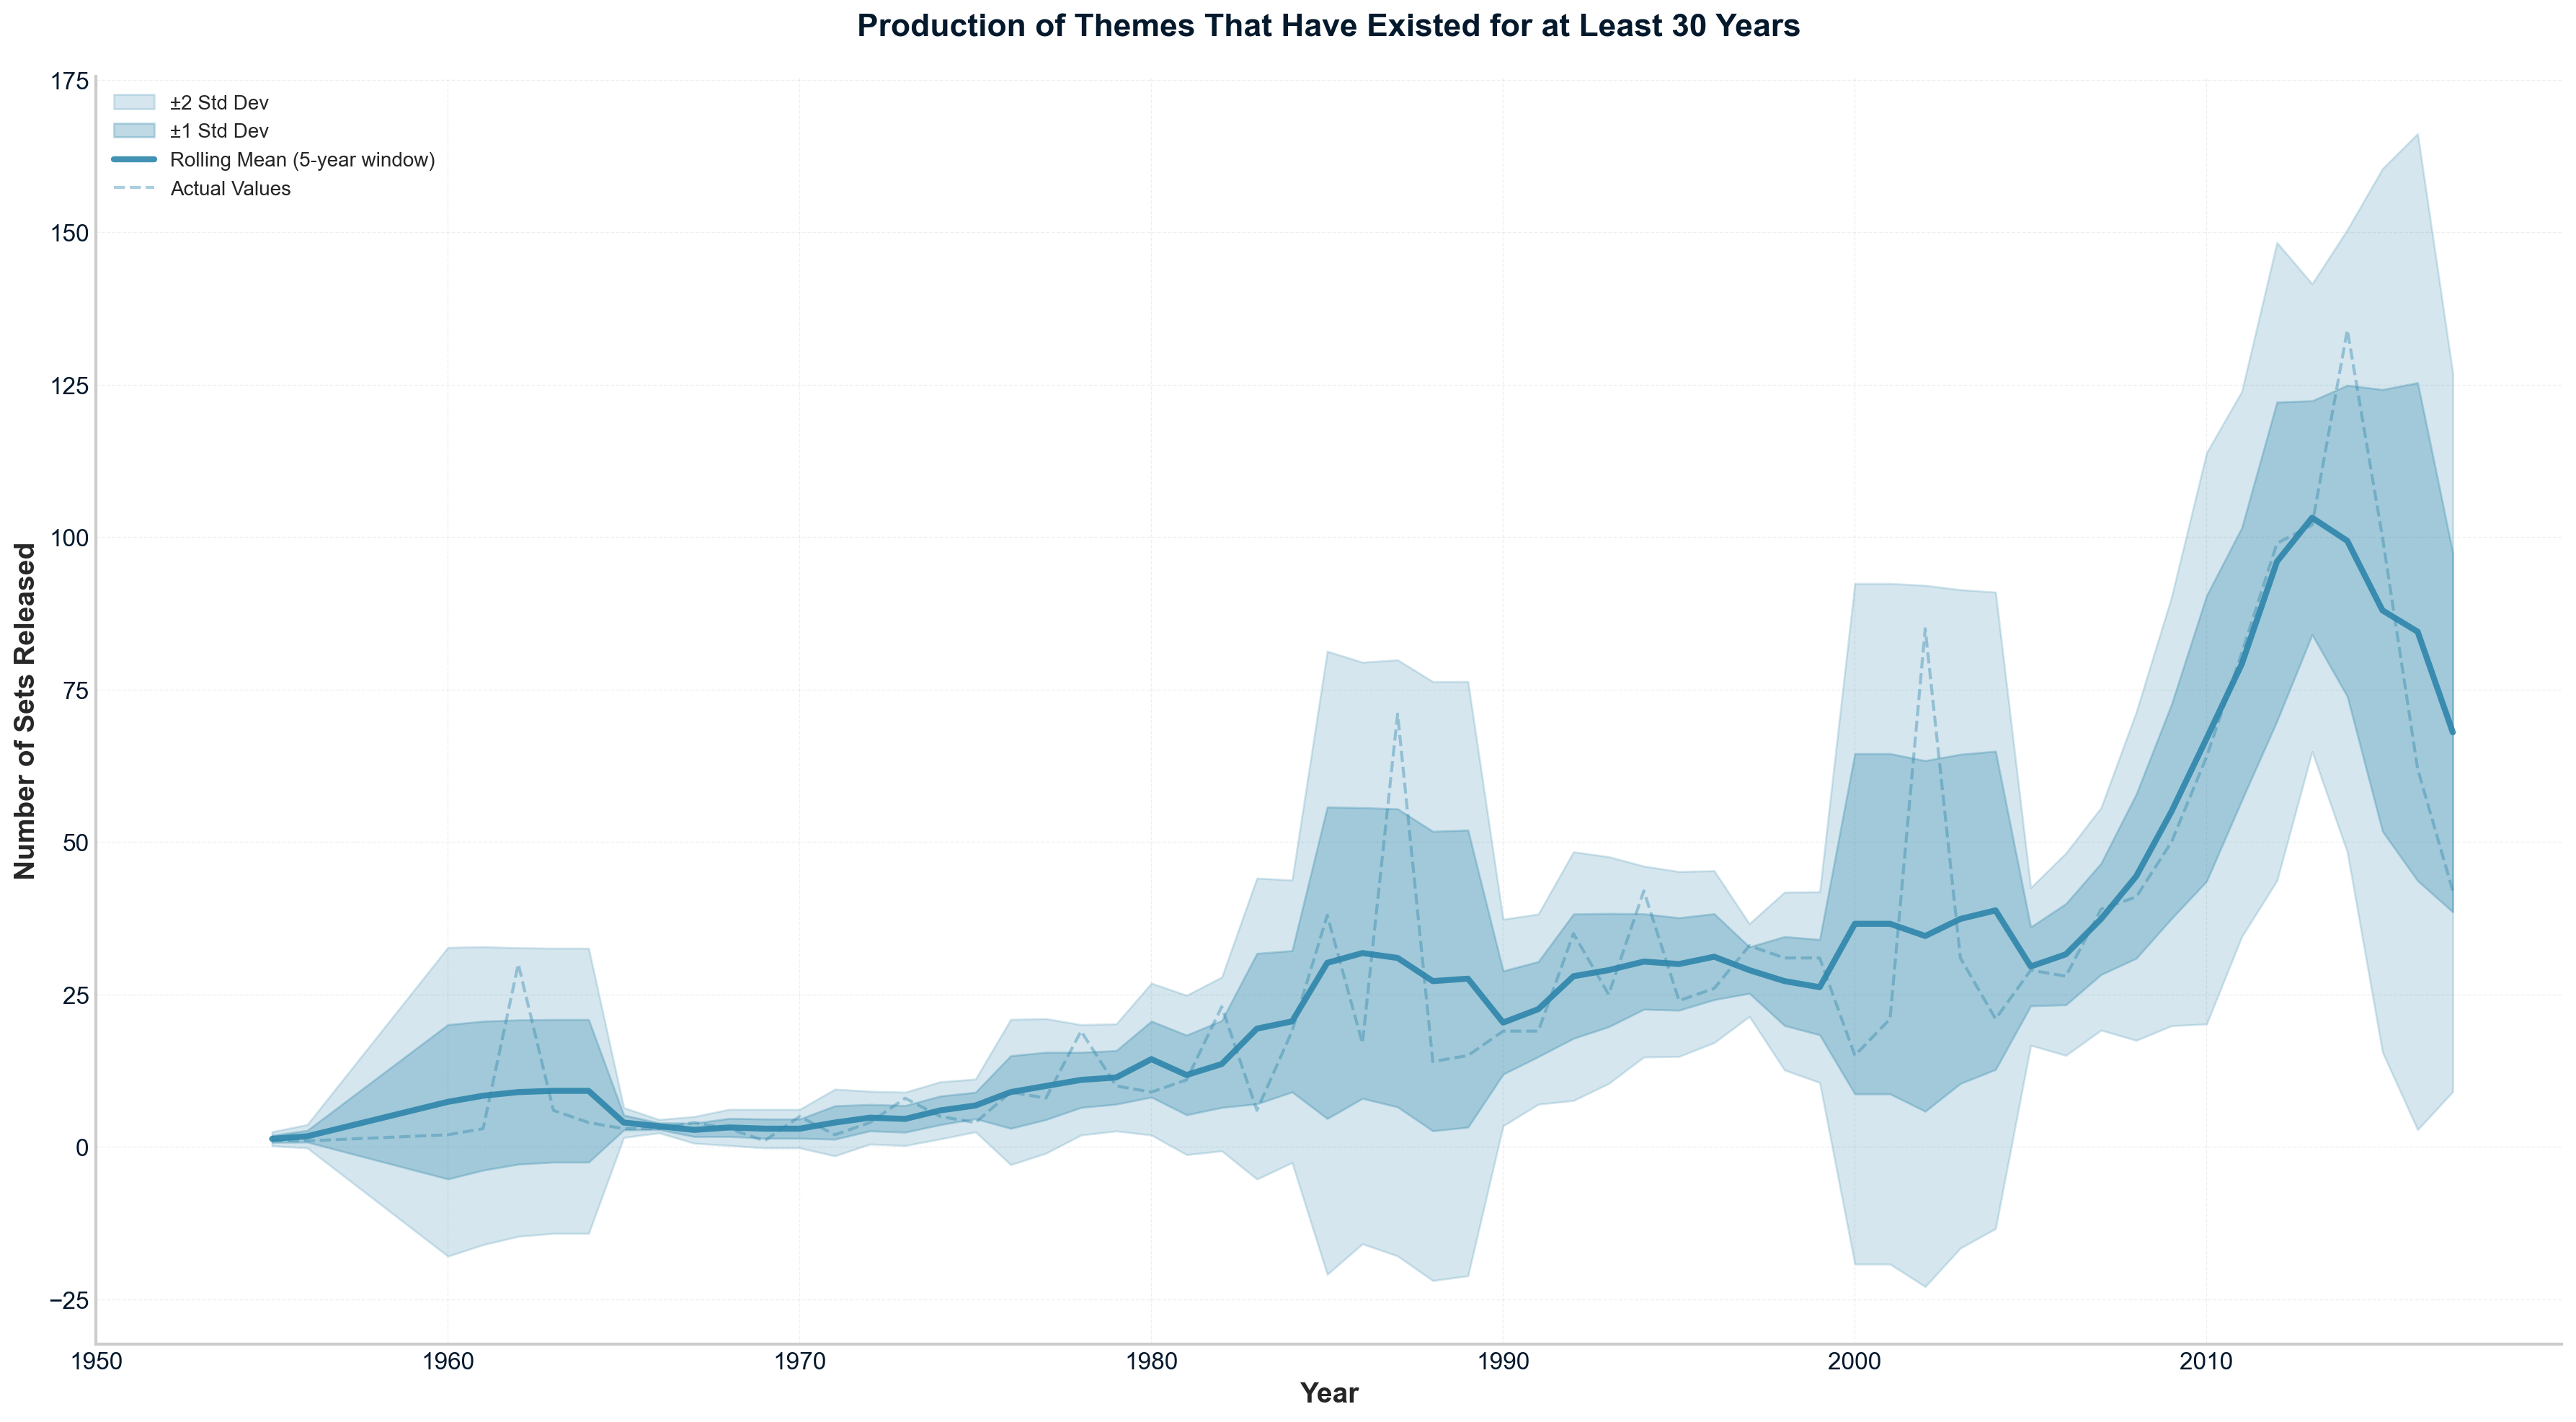

,theme_name,first_year,last_year,total_sets,duration,still_active
45,Books,1955,2017,57,63,True
57,Classic,1960,2017,17,58,True
10,Airport,1961,2017,172,57,True
21,Architecture,1962,2017,59,56,True
354,Traffic,1963,2017,153,55,True
106,Fire,1964,2017,131,54,True
224,Police,1972,2017,174,46,True
322,Technic,1973,2017,435,45,True
117,Gear,1976,2017,246,42,True
89,Duplo,1977,2017,219,41,True


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import warnings
warnings.filterwarnings('ignore')

theme_year_summary = (
    over_30_years.groupby(['theme_name', 'year'], as_index=False)
      .agg(num_sets=('set_name', 'nunique'))
      .sort_values(['theme_name', 'year'])
)

max_year = theme_year_summary['year'].max()

theme_stats = (
    theme_year_summary
    .groupby('theme_name')
    .agg(
        first_year=('year', 'min'),
        last_year=('year', 'max'),
        total_sets=('num_sets', 'sum')
    )
    .reset_index()
)

theme_stats['duration'] = theme_stats['last_year'] - theme_stats['first_year'] + 1
theme_stats['still_active'] = theme_stats['last_year'] == max_year

long_lived_active = (
    theme_stats[
        (theme_stats['duration'] >= 30) &
        (theme_stats['still_active'])
    ]
    .sort_values('duration', ascending=False)
)

if long_lived_active.empty:
    display(theme_stats.sort_values('duration', ascending=False).head(20))
else:
    long_lived_themes = long_lived_active['theme_name'].tolist()
    long_lived_data = theme_year_summary[
        theme_year_summary['theme_name'].isin(long_lived_themes)
    ].copy()

    combined_data = (
        long_lived_data
        .groupby('year', as_index=False)
        .agg(num_sets=('num_sets', 'sum'))
        .sort_values('year')
    )

    window_size = 5
    combined_data['rolling_mean'] = (
        combined_data['num_sets']
        .rolling(window=window_size, center=True, min_periods=1)
        .mean()
    )
    combined_data['rolling_std'] = (
        combined_data['num_sets']
        .rolling(window=window_size, center=True, min_periods=1)
        .std()
    )

    combined_data['rolling_mean'] = combined_data['rolling_mean'].fillna(combined_data['num_sets'])
    combined_data['rolling_std'] = combined_data['rolling_std'].fillna(0)

    fig, ax = plt.subplots(figsize=(18, 10))

    upper_2std = combined_data['rolling_mean'] + 2 * combined_data['rolling_std']
    lower_2std = combined_data['rolling_mean'] - 2 * combined_data['rolling_std']
    upper_1std = combined_data['rolling_mean'] + combined_data['rolling_std']
    lower_1std = combined_data['rolling_mean'] - combined_data['rolling_std']

    ax.fill_between(
        combined_data['year'], lower_2std, upper_2std,
        alpha=0.2, color='#2E86AB', label='±2 Std Dev'
    )
    ax.fill_between(
        combined_data['year'], lower_1std, upper_1std,
        alpha=0.3, color='#2E86AB', label='±1 Std Dev'
    )

    ax.plot(
        combined_data['year'], combined_data['rolling_mean'],
        linewidth=3, color='#2E86AB', alpha=0.9,
        label='Rolling Mean (5-year window)'
    )

    ax.plot(
        combined_data['year'], combined_data['num_sets'],
        linewidth=1.5, color='#2E86AB', alpha=0.4,
        linestyle='--', label='Actual Values'
    )

    ax.set_xlabel('Year', fontsize=14, fontweight='bold')
    ax.set_ylabel('Number of Sets Released', fontsize=14, fontweight='bold')
    ax.set_title(
        'Production of Themes That Have Existed for at Least 30 Years',
        fontsize=16, fontweight='bold', pad=20
    )

    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)

    min_year = long_lived_data['year'].min()
    max_year_plot = long_lived_data['year'].max()
    x_ticks = range(int(min_year) - (int(min_year) % 10), int(max_year_plot) + 1, 10)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticks, rotation=0)

    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    ax.legend(loc='best', fontsize=10, framealpha=0.9)

    plt.tight_layout()
    plt.show()

long_lived_active

## **Figure 4)**

Here we look to investigate themes that didn't disappear. While the vast majority of themes come up, become popular, and disappear, we want to look at themes that stick around for a while or are popular, for example 86% of themes don't last longer than five years, this shows some of the most popular themes or the most producing themes that have both lasted long over time and are still contributing to overall production. While there are less of these themes, their consistency and popularity is a main percentage in the overall LEGO production and amount of sets produced each year, which is a main data point for helping answer our overarching question.

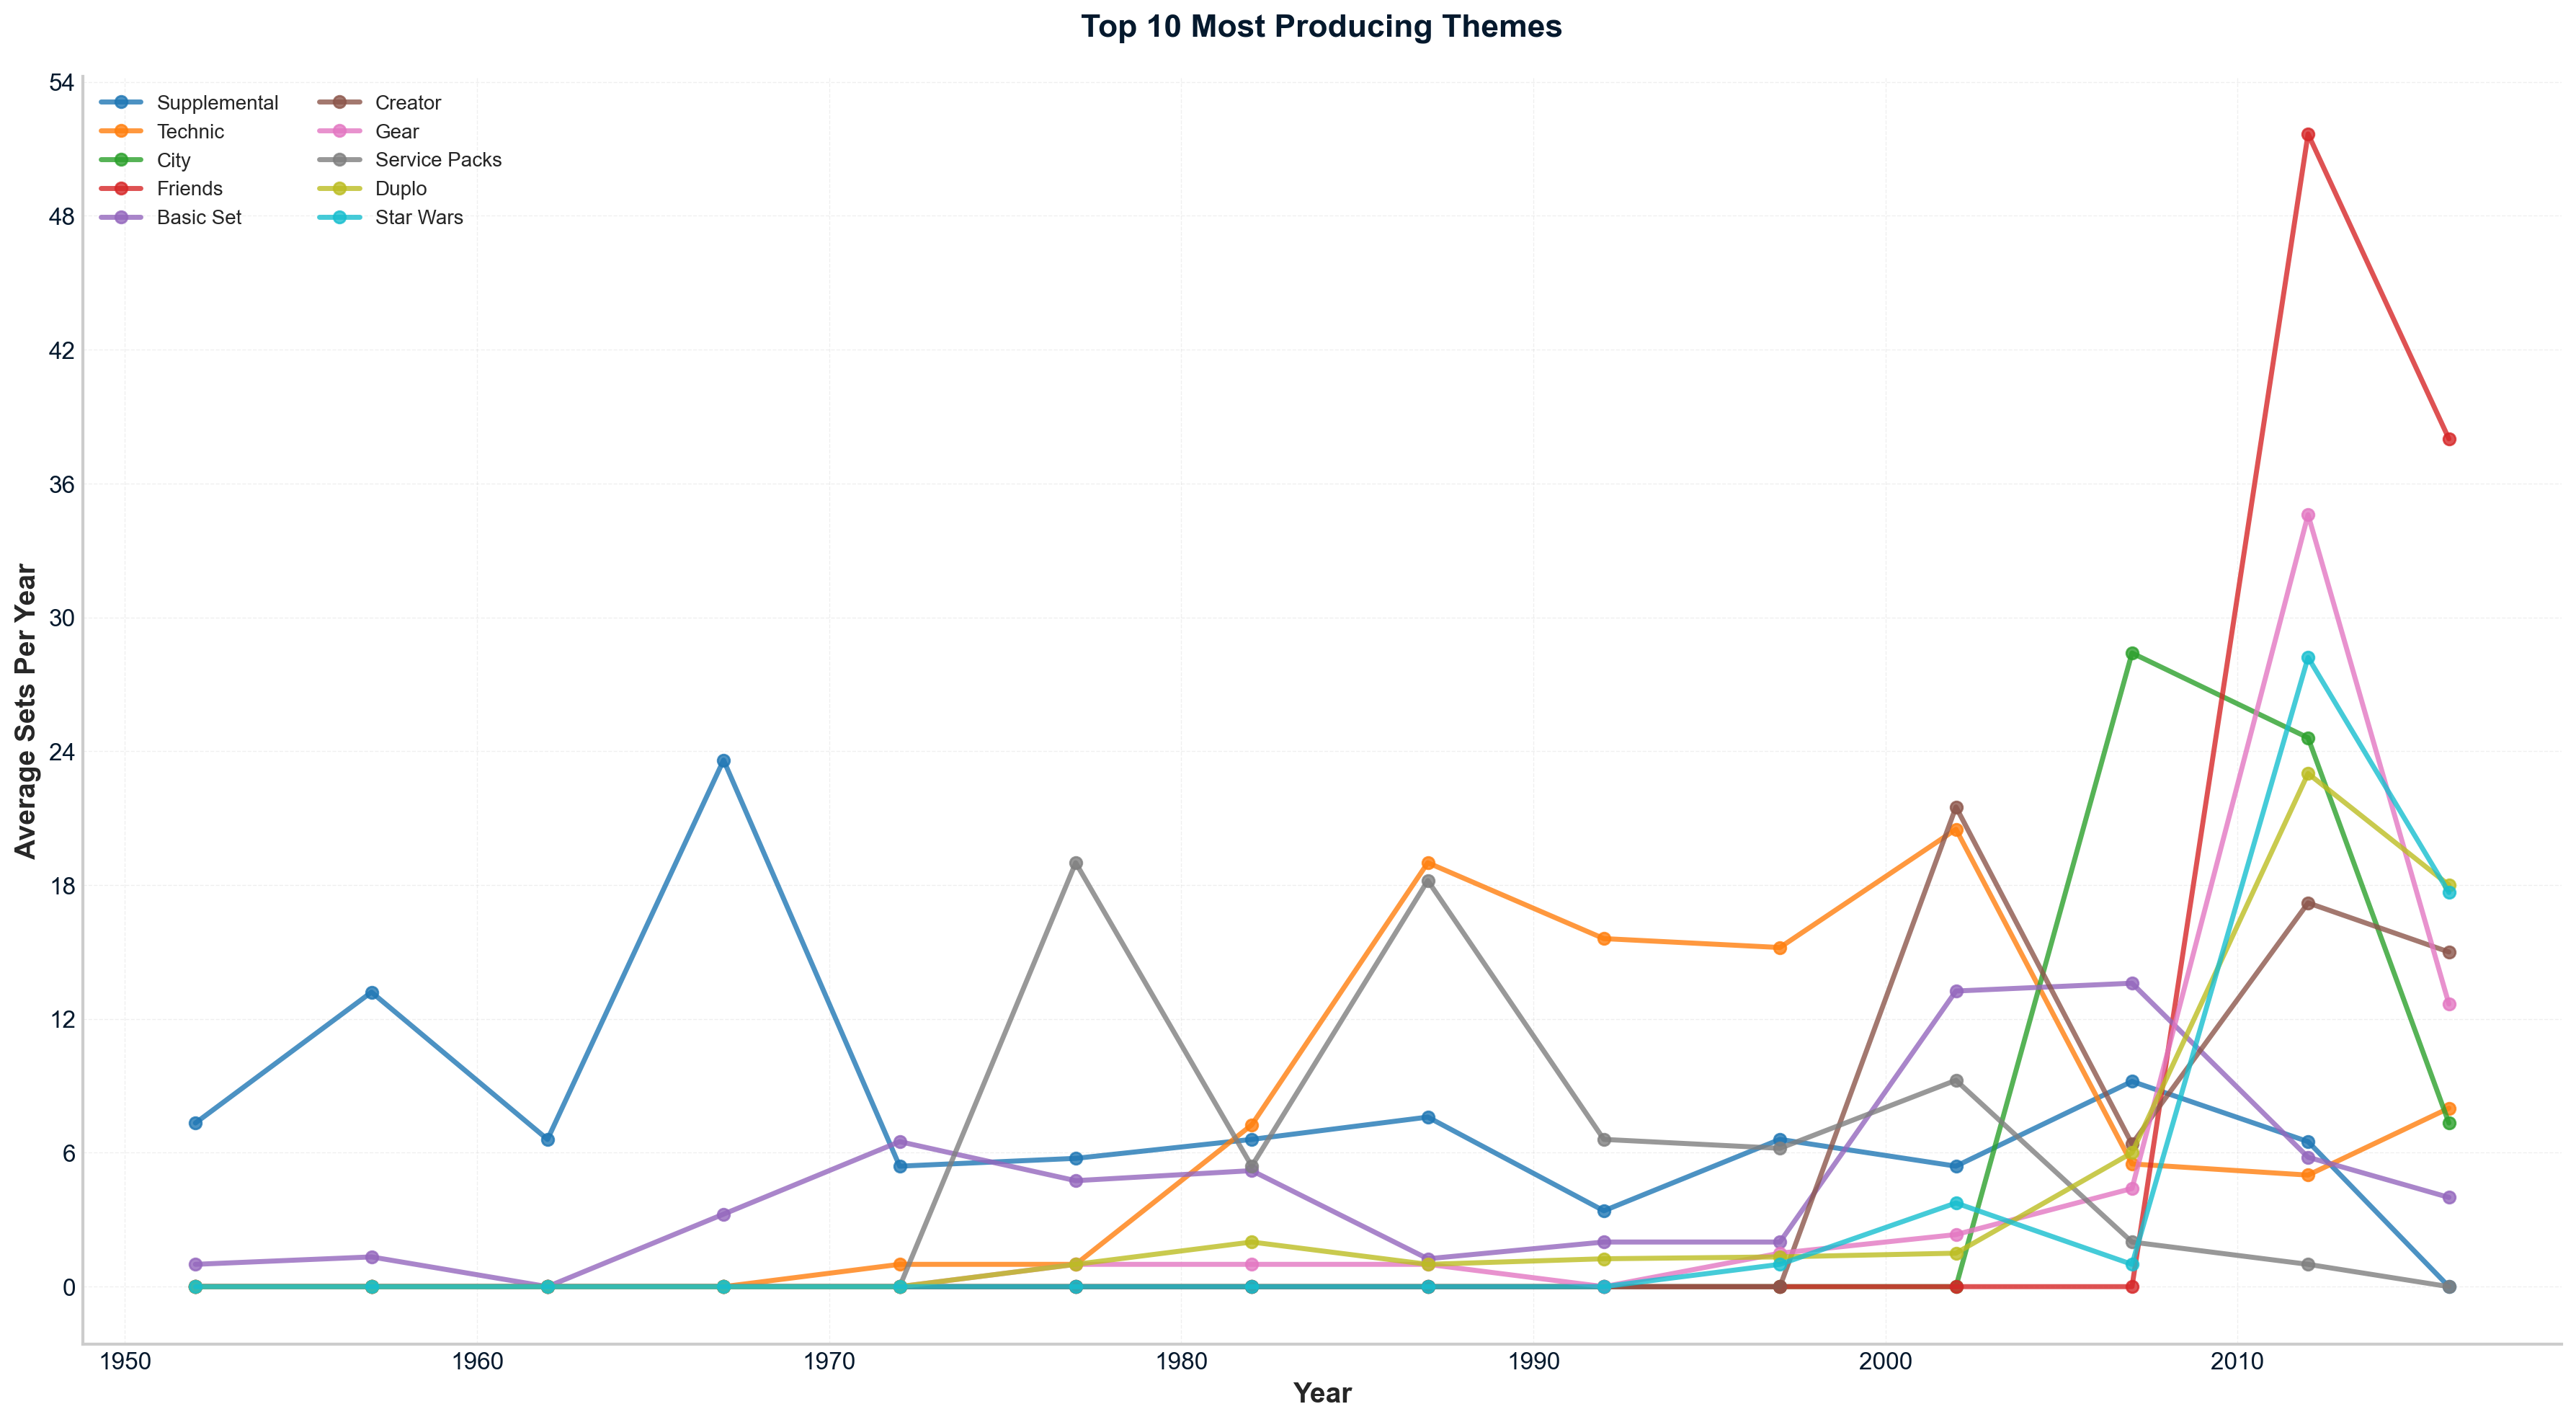

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['font.size'] = 11

theme_year_summary = num_sets_theme_name.copy().sort_values(['theme_name', 'year'])

theme_rankings_all_time = (
    theme_year_summary
    .groupby('theme_name', as_index=False)['num_sets']
    .sum()
    .rename(columns={'num_sets': 'total_sets'})
    .sort_values('total_sets', ascending=False)
)

top_10_themes = theme_rankings_all_time.head(10)['theme_name'].tolist()
top_10_data = theme_year_summary[
    theme_year_summary['theme_name'].isin(top_10_themes)
].copy()

fig, ax = plt.subplots(figsize=(18, 10))

periods = [
    (1950, 1954), (1955, 1959), (1960, 1964), (1965, 1969),
    (1970, 1974), (1975, 1979), (1980, 1984), (1985, 1989),
    (1990, 1994), (1995, 1999), (2000, 2004), (2005, 2009),
    (2010, 2014), (2015, 2017)
]

period_centers = [(start + end) / 2 for start, end in periods]

colors = plt.cm.tab10(np.linspace(0, 1, len(top_10_themes)))

for i, theme in enumerate(top_10_themes):
    theme_data = (
        top_10_data[top_10_data['theme_name'] == theme]
        .sort_values('year')
    )

    period_avgs = []
    for start, end in periods:
        period_data = theme_data[
            (theme_data['year'] >= start) & (theme_data['year'] <= end)
        ]
        if len(period_data) > 0:
            avg = period_data['num_sets'].mean()
        else:
            avg = 0
        period_avgs.append(avg)

    ax.plot(
        period_centers,
        period_avgs,
        marker='o',
        linewidth=2.5,
        markersize=6,
        label=theme,
        color=colors[i],
        alpha=0.8
    )

ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Average Sets Per Year', fontsize=14, fontweight='bold')
ax.set_title(
    'Top 10 Most Producing Themes',
    fontsize=16,
    fontweight='bold',
    pad=20
)

ax.legend(loc='best', fontsize=10, ncol=2, framealpha=0.9)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

min_year = min(period_centers)
max_year = max(period_centers)
x_ticks = range(int(min_year) - (int(min_year) % 10), int(max_year) + 1, 10)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks, rotation=0)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.tight_layout()
plt.show()

---

## **Figure 5)**

This figure represents a line graph that displays the trend of LEGO part diversity over time for the top five largest themes, using the average number of unique parts per set as a measure of complexity. Each line represents a theme, and points correspond to the average number of unique parts per set for that year. 

To improve our analysis, we will apply bootstrapping, a resampling method that repeatedly draws samples with replacement from the raw per-set data. For each theme-year group, we generate thousands of bootstrap resamples to estimate how much the average unique-part count could vary due to sampling variation or limited data. As a result, we get 95% confidence intervals that make our trend lines more reliable, which are shown by the shaded regions around each point.

By utilizing a line graph and bootstrapping, we are able to see the progression of average unique parts per set count throughout the years. This allows us to address our research question: "How has the diversity of LEGO parts in the top five most popular themes increased over time?". Themes with upward trends throughout the years and narrow confidence intervals display a clearer increase in part diversity, whereas themes with wide intervals show more uncertainty due to fewer sets released in those years.

There are limitations to note. Some data points are missing due to the database not containing a LEGO set for every year. While we are still able to determine a trend from the existing data points, having an increased number of data points would allow us to fill in gaps that we have to currently estimate with surrounding data points. Along with this, some theme-year combinations have a small number of sets, which results in increased uncertainty and larger confidence intervals. 

Despite these limitations, this visualization provides a clear depiction of how part diversity has evolved across the top five largest LEGO themes, which indicates stability and growth within these sectors.

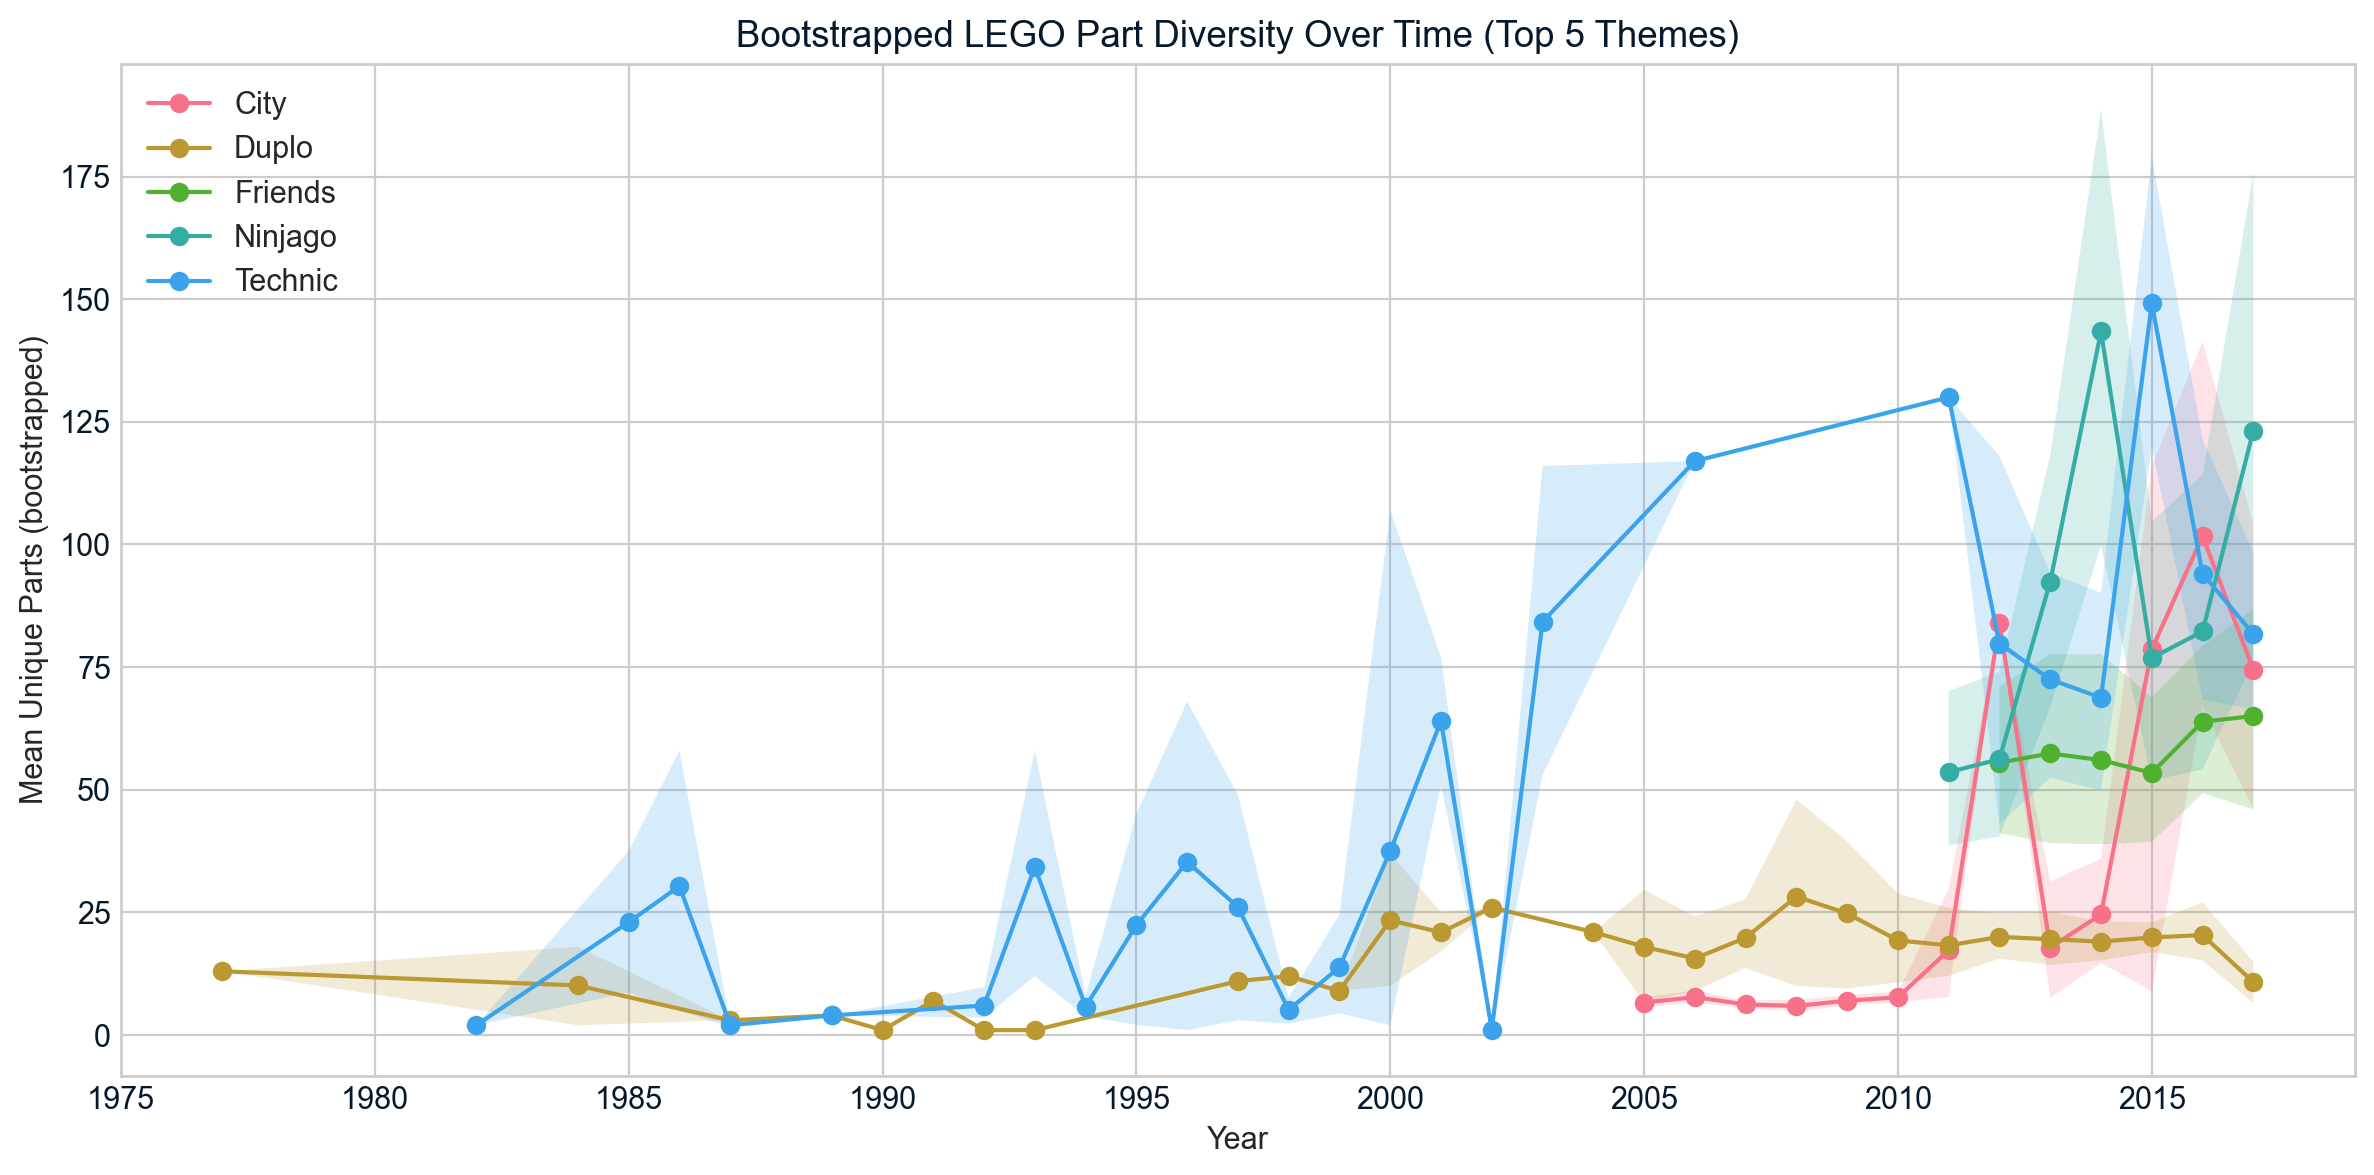

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Copy your cleaned dataset
df = num_unique_parts.copy()

# Keep only needed columns
# df = df[['theme_name', 'year', 'unique_parts']].dropna()

# Convert numeric values
df['year'] = df['year'].astype(int)
df['unique_parts'] = df['unique_parts'].astype(float)

# Pick top 5 themes by dataset size
top5 = (
    df.groupby('theme_name')['unique_parts']
      .count()
      .sort_values(ascending=False)
      .head(5)
      .index
)

df = df[df['theme_name'].isin(top5)]

# Number of bootstrap samples
B = 2000

# Store results
boot_results = []

# Bootstrapping per theme-year
for theme, g_theme in df.groupby('theme_name'):
    for year, g_year in g_theme.groupby('year'):
        
        values = g_year['unique_parts'].values
        
        # Draw B bootstrap means
        boot_means = [
            np.mean(np.random.choice(values, size=len(values), replace=True))
            for _ in range(B)
        ]
        
        boot_results.append({
            'theme_name': theme,
            'year': year,
            'boot_mean': np.mean(boot_means),
            'low_ci': np.percentile(boot_means, 2.5),
            'high_ci': np.percentile(boot_means, 97.5),
            'n_sets': len(values)
        })

boot_df = pd.DataFrame(boot_results)

plt.figure(figsize=(12,6))

for theme, g in boot_df.groupby('theme_name'):
    g = g.sort_values('year')
    
    years = g['year']
    mean = g['boot_mean']
    low = g['low_ci']
    high = g['high_ci']
    
    plt.plot(years, mean, marker='o', label=theme)
    plt.fill_between(years, low, high, alpha=0.2)

plt.xlabel("Year")
plt.ylabel("Mean Unique Parts (bootstrapped)")
plt.title("Bootstrapped LEGO Part Diversity Over Time (Top 5 Themes)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Interpretation and Reporting

In our **Figure 1**, we are able to notice a sporadic difference across the top 5 lego sets, with varying degrees of growth and decline in average parts counts across the themed sets. For example, the line for Technic shows an uptick in the average parts per set over the years while the Duplo themed sets show a consistently low count in average parts per set. 

All of these diffrences across the top 5 LEGO themes in average parts per set count can be explained by LEGO's business model. LEGO has a considerable audience across the younger ages, however, a good amount of its audience can be found in adult LEGO enthusiasts as well. Therefore, to cater towards its massive age range audience, LEGO needed to have both kid friendly themed sets (sets that may have a lower average parts per set count) and more advanced LEGO enthusiasts (sets that may have a higher average parts per set count).

This is proven in figure 1 as the Technic theme, a theme consisting of highly advanced parts and pieces catered towards vehicle models and engineering technology loving LEGO builders, began to have a dramatic increase in parts per set as LEGO realized their engineering themed set became popular amongst their older audience. A similar effect is seen in City and Duplo themes as these are themes that include smaller sets, often sets that are to be used in conjuction with other sets and also often have more simpler designs to cater towards their younger audience, leading to a smaller average parts per set count. Over the years, LEGO realized their smaller parts per set count was suitable for the target audience and the it stayed consistent across the years. The Friends and Ninjago sets can be classified for the in-between ages as these themes cater towards the pre-teen audience, much like the Ninjago TV show does, explaining higher values compared to the Duplo and City sets and lower values compared to the Technic sets.

Another aspect of **figure 1** we can analyze are the confidence interval bands around the average parts per set count for each year and theme. As seen in this figure, we can see that Duplo and City consistently had the smallest confidence intervals which mean that sets in these 2 themes were fairly consistent in size across their sets. This makes sense looking at the context as these themes tend to have a lower average parts per set size to cater to their younger audiences. While themes like Technic, Friends, and Ninjago have significantly larger confidence intervals because of the higher average parts per set size and more complicated LEGO sets to cater towards older audiences.

Below is a comparison of Duplo and Technic sets respectively, as you can see, the Technic boasts a complicated LEGO build while the Duplo shows a humble part count for easier assembling.

<img src="image.png" alt="image" width="300" height="200">
<img src="image-1.png" alt="image1" width="300" height="200">


In Figure 2-4, we look at analyzing how LEGO sets released each year vary across different LEGO set themes and how that's increased the total amount of sets. And in our findings, we see that really there are no strong themes that stay consistent over time that push up the total amount over time, while there are 20 or so themes that are consistent, the vast majority of themes that come in to increase or decrease production are short spurts. A lot of sets come in for a few years, they have a lot of sets, and then disappear. This shows that there is no main theme that is really pushing the production of LEGO sets.

So for answering the question "How has the growth in total LEGO sets released each year varied across different LEGO themes?" We find that there are not many dominant, consistent themes, and that the vast majority of themes come up, become popular, and disappear shortly. We find that of the 386 themes we analyzed, 331 of them are no longer being produced, pointing out how sets come, become popular, and then quickly disappear, and those are the vast majority in the production of LEGO sets.

In Figure 5, we can see that the LEGO part diversity has generally increased over time for most of the themes. LEGO City, Friends, Ninjago, and Technic all show clear upward trends in their mean unique part counts. This indicates the increasing complexity and variation in construction for their sets over time, which supports the growth for these themes. The demand for more sets results in the need for more specialized elements, which drives the growth of the theme as a whole. Along with this, since the confidence intervals narrow in years with many sets and widen in years with fewer releases, we can be confident that the upward trend is consistently supported by the data.

However, one theme that defies the sharp upward trend is the LEGO Duplo theme, which carries a more stable trend throughout the years. This is supported by a small confidence interval band, which suggests that each year had multiple sets that all followed the simplistic trend. The stable, flat trend that Duplo follows over its 40 year lifespan reflects the intentional choice of LEGO maintaining the simpler and safer design philosophy behind the theme, as the sets are made for younger children to enjoy. Because Duplo sets rely on fewer, larger, generalized elements, the theme does not require the growing pool of specialized parts seen in other themes.

These results address the main question "Which Lego themes have grown or declined over time?" by showing that four of the five biggest themes by set size exhibit growth in part diversity, which indicates increasing design complexity and development focus. One out of the five biggest themes, Duplo, has meanwhile remained stable rather than growing or declining, reflecting intentional consistency rather than thematic evolution.


---

# **Conclusion**

After analyzing these 3 sub-questions, we can see which LEGO themes have grown and declined over time and the reasons why the largest LEGO themes have grown the way they have over the years. Factors such as an increasing part count per set, the variation in number of sets released, and the increased part diversity per set result in the top LEGO themes growing in size over time. It's important for LEGO to expand upon its well-performing franchises, and these indicators support the reason behind how LEGO is focusing on growing each theme and what trends may naturally follow as a result. 

Some potential areas of interest may be a metric of measuring popularity among LEGO sets. In this report, we were limited to details about the themes, sets, and bricks only and did not have a metric to measure sales or general population interest about specific LEGO sets. With a way to measure popularity we can bring in more observations on a business perspective about LEGOs as a whole.

In the future, one potential research question that expands on the growth and decline of certain LEGO themes is focusing on the pricing structure in relation to set complexity can reveal insights into how LEGO can bring in larger revenue as a theme grows. Another research question that further expands on this is examining the minifigure distribution among sets will allow us to expand on why certain LEGO themes may grow over time. These potential research areas will drive a more specific and result-driven interpretation of the lifespan of a LEGO theme and serve us new insights that support our current findings.

---

# Contribution Report

All team members, Larissa Kim, William Colglazier, and Tristan-Lee Aujong were able to contribute equally to the project. Each team member dived into their own sub-question and made their own analysis, data organization, and interpretation. Larissa did the question "How has the average part count per set changed over time within the five largest LEGO themes?", William did the question "How has the growth in total LEGO sets released each year vary across different LEGO themes?", and Tristan did the question "How has the diversity of LEGO parts in the top five most popular themes increased over time?". The Data Collection and Defining the Question components were done in collaboration with all team members. We all also worked together to improve each other's ideas and proof-checked each other's work.